In [1]:
pwd

'/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/python'

In [2]:
cd '/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/proseplots' 

/Users/alclark/Documents/GitHub/Matplotlib-for-Storytellers/figures/proseplots


In [3]:
import nbformat
#prose_img_path = 'figures/proseplots/'

In [4]:
def savepy(filename, source: str = None, cell_no: int = None):
    '''
    Save python file from string. Assumes the working directory is the root project folder.
    '''
    filename = filename + '.py'
    path = '../../python/'

    current_cell = get_ipython().execution_count
    
    if source is None:
        if cell_no is None:
            cell_no = current_cell - 2 # - 1 for 0-based -1 again for previous
            #raise Exception("need source or cell number.")
        # get cell source
        tmp = nbformat.read(path + 'Figure-Dev.ipynb', as_version=4)
        cell = tmp.cells[cell_no]
        source = cell['source']
        
        # truncate source
        trunc_word = '#truncate'
        if trunc_word in source:
            source = source[:source.index(trunc_word)]
            
        # strip white space
        lines = source.splitlines()
        for i in range(len(lines)):
            lines[i] = lines[i].rstrip()
        source = '\n'.join(lines)
        
    with open(path + filename, 'w') as f:
        f.write(source)

In [5]:
# preface - imports

In [6]:
import numpy as np
import pandas as pd
import math
from itertools import combinations
from itertools import product
from sklearn.datasets import load_iris 

# matplotlib specific
import matplotlib as mpl
import matplotlib.pyplot as plt

# For Special Topics
# import ternary # requires install
# from ternary.helpers import simplex_iterator
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from scipy import stats

# Made redundant in the text
from matplotlib import colors
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import colorConverter
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.dates as mdates
from matplotlib import font_manager

In [7]:
savepy('imports')

In [8]:
# versions

In [9]:
!python --version

Python 3.9.13


In [10]:
mpl.__version__

'3.5.1'

In [11]:
# OOP

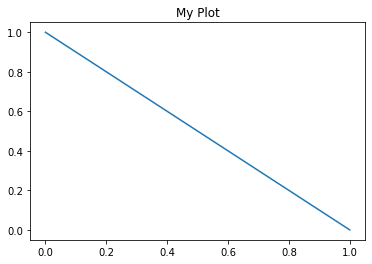

In [12]:
import matplotlib.pyplot as plt
x = 1,0
y = 0,1

plt.plot(x,y)
plt.title("My Plot")
#truncate
plt.savefig('matlab-plot.pdf')
plt.show()

In [13]:
savepy('matlab-plot')

In [14]:
fig, ax = plt.figure(), plt.axes()
ax.plot(x,y)
ax.set_title("My Plot")
#truncate
plt.tight_layout()
plt.savefig('oop-plot.pdf')
plt.close()

In [15]:
savepy('oop-plot')

In [16]:
fig = plt.figure(figsize = (2,3),
                 facecolor = 'gray') 
ax = plt.axes(facecolor = 'lightyellow')
#truncate
plt.tight_layout()
plt.savefig('figparams.pdf')
plt.close()

In [17]:
savepy('figparams')

Text(0.5, 1.0, 'My Chart')
My Chart
My Wholesome Chart


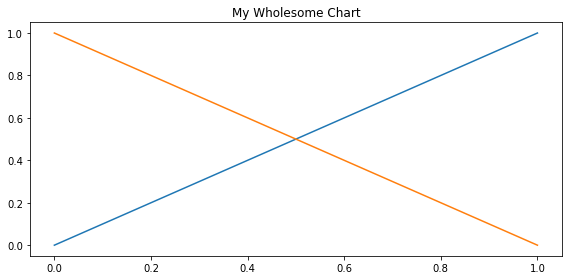

In [18]:
x = np.linspace(0,1,2)   
fig, ax = plt.figure(figsize = (8,4)), plt.axes()
ax.plot(x, x)
ax.plot(x, 1 - x)
ax.set_title("My Chart")
print(ax.title)
print(ax.get_title())  # Similar to above line
ax.set_title("My Wholesome Chart")
print(ax.get_title())  # long      
#truncate
plt.tight_layout()
plt.savefig('gettersetter.pdf')
plt.show()

In [19]:
savepy('gettersetter')

In [20]:
# OOP - mixing the interfaces

Text(0.5, 1.0, 'My Chart')
Text(0.5, 1.0, 'My Wholesome Chart')


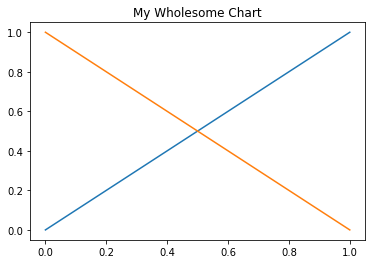

In [21]:
x = np.linspace(0,1,2) 
plt.plot(x,x)
plt.title("My Chart")

ax = plt.gca()
print(ax.title)

ax.plot(x, 1 - x)
ax.set_title('My Wholesome Chart')
print(ax.title)
#truncate
fig = plt.gcf()
fig.savefig('chart.pdf') # same as plt.savefig

In [22]:
savepy('chart')

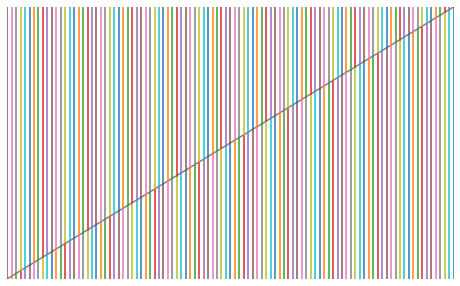

In [23]:
# OOP Start 
fig, ax = plt.figure(figsize = (8,5)), plt.axes()

x = np.linspace(0,100,2)
ax.plot(x, x, color = 'gray')

ax.set_xlim([0,100])
ax.set_ylim([0,100])

# Back to pyplot functions
for i in range(101):
    plt.axvline(i,0, i / 100, color = 'C' + str(i))
    plt.axvline(i, i/100, 1, color = 'C' + str(i+5))
    
plt.axis('off')
plt.savefig('colorful.pdf')
#truncate
fig.savefig('chart.pdf')

In [24]:
savepy('colorful')

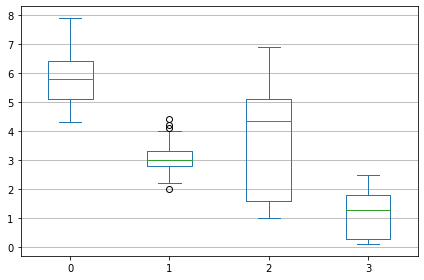

In [25]:
from sklearn.datasets import load_iris 
data = load_iris()['data']
df = pd.DataFrame(data)

fig, ax = plt.figure(), plt.axes()

df.plot.box(ax = ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.tight_layout()
plt.savefig('irisbox.pdf')

In [26]:
savepy('irisbox')

In [27]:
# Chapter 2 Ticks

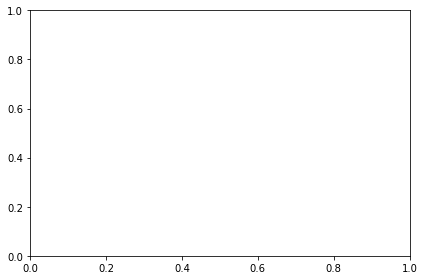

In [28]:
fig, ax = plt.figure(), plt.axes()
#truncate
plt.tight_layout()
plt.savefig("empty.pdf")

In [29]:
savepy('empty')

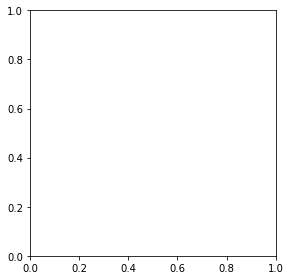

In [30]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect('equal')
#truncate
plt.tight_layout()
plt.savefig("empty-square.pdf")

In [31]:
savepy('empty-square')

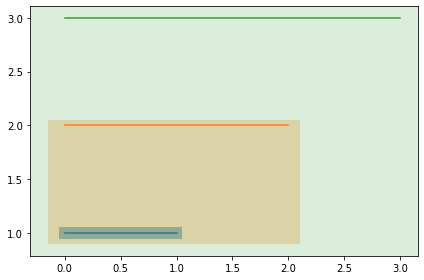

In [32]:
fig, ax = plt.figure(), plt.axes()

for i in range(1,4):
    ax.plot([0,i], [i,i])
    bottom_y, top_y = ax.get_ylim()
    left_x, right_x = ax.get_xlim()
    ax.fill_between(x = [left_x,right_x], 
                    y1 = bottom_y, 
                    y2 = top_y, 
                    alpha = 0.5/i)

# Prevent limits from automatically stretching further
# The last fill_between would stretch limits again
ax.set_ylim(bottom_y, top_y)
ax.set_xlim(left_x, right_x)
#truncate
plt.tight_layout()
plt.savefig("expanding-lims.pdf")

In [33]:
savepy('expanding-lims')

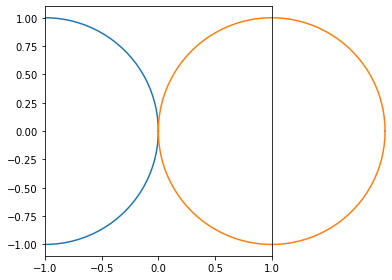

In [34]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)

# Create a unit circle
u = np.linspace(0,2*np.pi,100)
x = np.cos(u)
y = np.sin(u)

# Default, clip_on = True
ax.plot(x-1, y)

# Unclipped, extends beyond the axes
ax.plot(x+1, y, clip_on = False)

ax.set_xlim(-1,1)
#truncate
plt.tight_layout()
plt.savefig("circle-clip.pdf")

In [35]:
savepy('circle-clip')

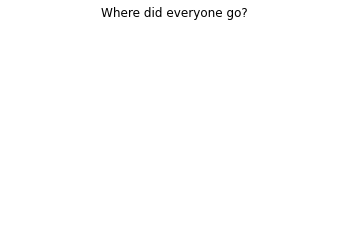

In [36]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Where did everyone go?")
ax.axis('off')
#truncate
plt.savefig("no-axis.pdf")
plt.show()

In [37]:
savepy("no-axis")

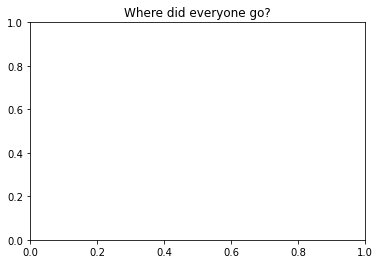

In [38]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Where did everyone go?")
#truncate
plt.savefig("yes-axis.pdf")
plt.show()

In [39]:
savepy('yes-axis')

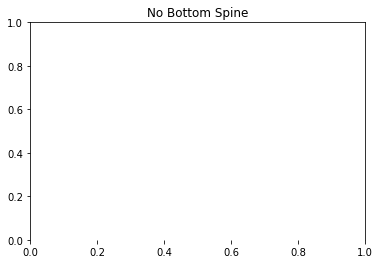

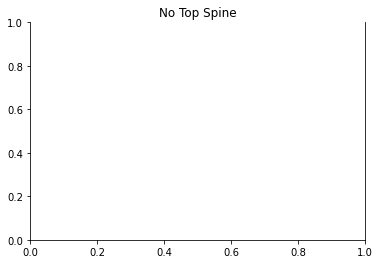

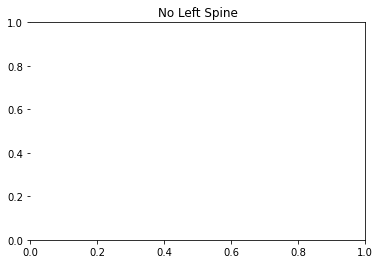

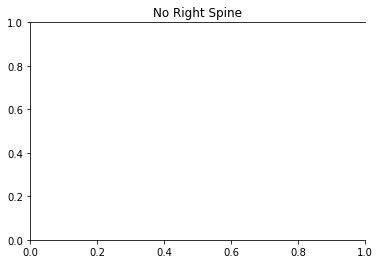

In [40]:
for spine in 'bottom', 'top', 'left', 'right':
    fig, ax = plt.figure(), plt.axes()
    ax.set_title("No " + spine.title() + " Spine")
    ax.spines[spine].set_visible(False)
    plt.show()
    #truncate
    fig.savefig(f"spine-vis-{spine}.pdf")

In [41]:
savepy('spine-vis')

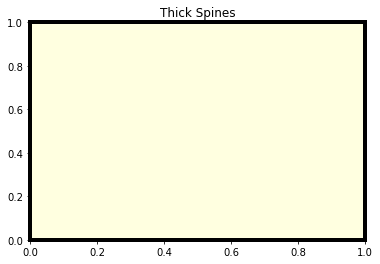

In [42]:
fig, ax = plt.figure(), plt.axes(facecolor = 'lightyellow')
ax.set_title("Thick Spines")
for spine in 'bottom', 'top', 'left', 'right':
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(4)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
#truncate
plt.savefig("thick-spines.pdf")
plt.show()

In [43]:
savepy('thick-spines')

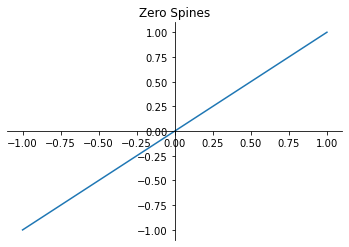

In [44]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Zero Spines")
ax.plot([-1,1], [-1,1]) 
for spine in 'top',  'right':
    ax.spines[spine].set_visible(False)
for spine in 'bottom',  'left':
    ax.spines[spine].set_position('zero')
#truncate
plt.savefig("zero-spines.pdf")
plt.show()

In [45]:
savepy("zero-spines")

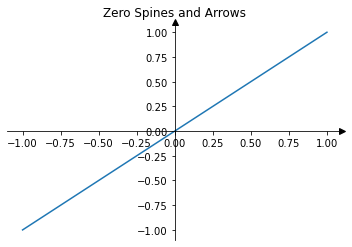

In [46]:
fig, ax = plt.figure(), plt.axes()
ax.set_title("Zero Spines and Arrows")
ax.plot([-1,1], [-1,1])
for spine in 'top',  'right':
    ax.spines[spine].set_visible(False)
for spine in 'bottom',  'left':
    ax.spines[spine].set_position('zero')

# get current limits
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# Add arrows
ax.plot(xlims[1], 0, ">k", clip_on = False)
ax.plot(0, ylims[1], "^k", clip_on = False)

# revert limits to before the arrows
ax.set_xlim(xlims)
ax.set_ylim(ylims)
#truncate
plt.savefig("arrow-axes.pdf")

In [47]:
savepy('arrow-axes')

In [48]:
# ticks

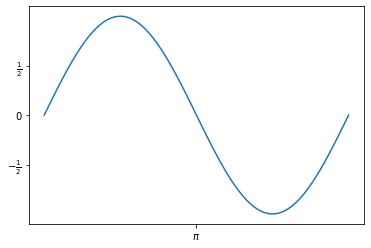

In [49]:
x = np.linspace(0, np.pi * 2, 100)

fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))

# Y axis
ax.set_yticks( [-0.5, 0, 0.5] )
ax.set_yticklabels( [r"$-\frac{1}{2}$", 0,  r"$\frac{1}{2}$"] )

# X axis
ax.xaxis.set_ticks([np.pi])
ax.xaxis.set_ticklabels([r"$\pi$"])
#truncate
plt.savefig("ticks1.pdf")

In [50]:
savepy('ticks1')

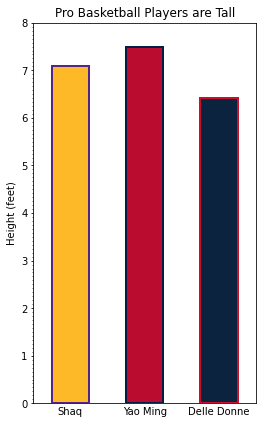

In [51]:
heights = pd.Series( {'Shaq': 7 + (1/12),
                     'Yao Ming': 7.5,
                     'Delle Donne': 6 + (5/12)})

fig, ax = plt.figure(figsize = (4,7)), plt.axes()

heights.plot.bar(ax = ax, 
        color = ['#FDB927', '#BA0C2F', '#0C2340'], 
        edgecolor = ['#552583', '#041E42', '#C8102E'],
        linewidth = 2)
# https://teamcolorcodes.com/ 
# LA Lakers and Houston Rockets and DC Mystics

# Get rid of ticks on x-axis, rotate text
ax.xaxis.set_tick_params(length = 0, which = 'major', 
                         rotation = 0)

ylim0, ylim1 = 0,8
ax.set_ylim([ylim0, ylim1])

ax.set_yticks(range(ylim0, ylim1+1))
#ax.yaxis.set_major_locator(MultipleLocator(1))

ax.yaxis.set_minor_locator(MultipleLocator(1/12))
ax.yaxis.set_tick_params(length = 1, which = 'minor')
ax.yaxis.set_tick_params(length = 2, which = 'major')

ax.set_ylabel("Height (feet)")
ax.set_title("Pro Basketball Players are Tall")
#truncate
plt.savefig("tall-ballers.pdf")

In [52]:
savepy('tall-ballers')

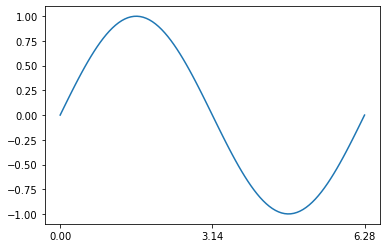

In [53]:
x = np.linspace(0, np.pi * 2, 100)

fig, ax = plt.figure(), plt.axes()
ax.plot(x, np.sin(x))

ax.xaxis.set_major_locator(MultipleLocator(np.pi))
#truncate
plt.savefig("mult-locator.pdf")
plt.show()

In [54]:
savepy('mult-locator')

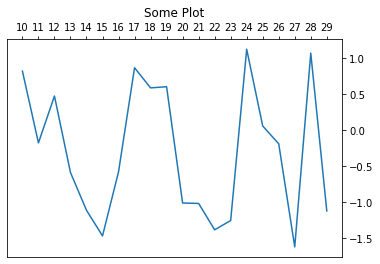

In [55]:
fig, ax = plt.figure(), plt.axes()
x = np.arange(10, 30, 1)
y = np.random.normal(size = len(x))
ax.plot(x,y)

# set what ticks are shown
ax.xaxis.set_ticks(x)

# move the ticks
ax.yaxis.tick_right()
ax.xaxis.set_ticks_position('top')

ax.set_title("Some Plot")
#truncate
plt.savefig('tick-right.pdf')
plt.show()

In [56]:
savepy('tick-right')

In [57]:
## ticks - grids

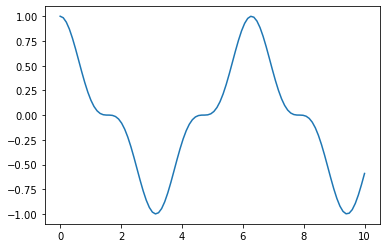

In [58]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,10,100)
ax.plot(x, np.cos(x)**3)
ax.grid(False)
#truncate
plt.savefig("grid-false.pdf")

In [59]:
savepy('grid-false')

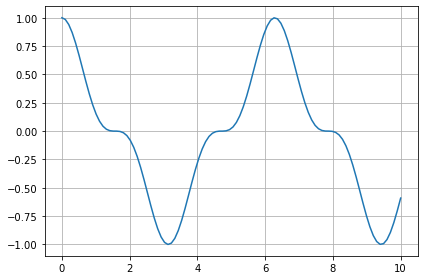

In [60]:
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0,10,100)
ax.plot(x, np.cos(x)**3)
ax.grid(True)
#truncate
plt.tight_layout()
plt.savefig("grid-true.pdf")
plt.show()

In [61]:
savepy('grid-true')

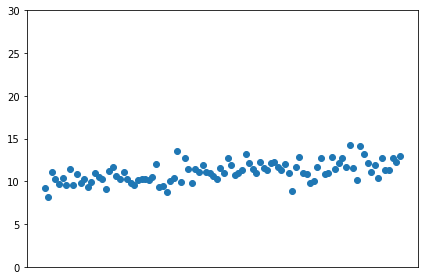

In [62]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0, 10, 100)
y = 10 + .2*x
points = y + np.random.normal(size = len(x))
ax.scatter(x,points)

ax.set_ylim(0,30)
ax.set_xticks([])
#truncate
plt.tight_layout()
plt.savefig("y-grid-false.pdf")
plt.show()

In [63]:
savepy('y-grid-false')

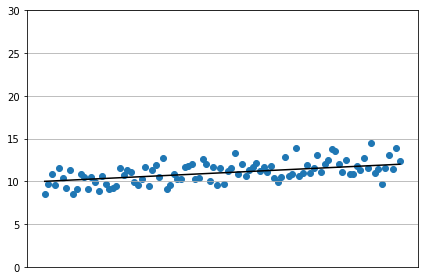

In [64]:
fig, ax = plt.figure(), plt.axes()

x = np.linspace(0,10, 100)
y = 10 + .2*x
points = y + np.random.normal(size = len(x))
ax.scatter(x,points)

ax.set_ylim(0,30)
ax.set_xticks([])

# Add grid and line of best fit
ax.yaxis.grid(True)
ax.plot(x, y, color = 'black')
#truncate
plt.tight_layout()
plt.savefig("y-grid-true.pdf")
plt.show()

In [65]:
savepy('y-grid-true')

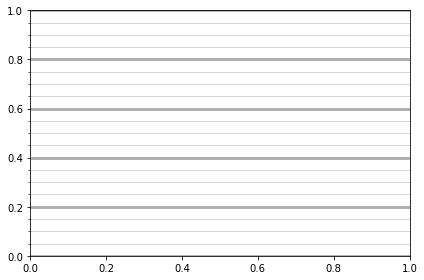

In [66]:
fig, ax = plt.figure(), plt.axes()
ax.xaxis.grid(False)
ax.yaxis.grid(True, linewidth = 3)
ax.yaxis.grid(True, which = 'minor', linewidth = 0.5) 
ax.yaxis.set_minor_locator(mpl.ticker.AutoMinorLocator())
#truncate
plt.tight_layout()
plt.savefig("grids-auto.pdf")
plt.show()

In [67]:
savepy('grids-auto')

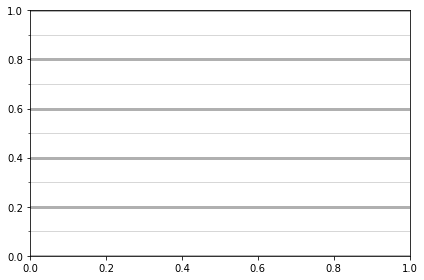

In [68]:
fig, ax = plt.figure(), plt.axes()
ax.xaxis.grid(False)
ax.yaxis.grid(True, linewidth = 3)
ax.yaxis.grid(True, which = 'minor', linewidth = 0.5) 
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(.1))
#truncate
plt.tight_layout()
plt.savefig("grids-multi.pdf")
plt.show()

In [69]:
savepy('grids-multi')

In [70]:
# ELEMENTS 

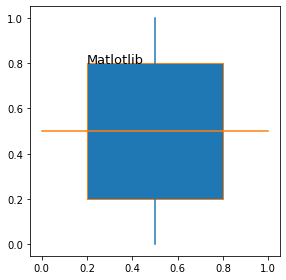

In [71]:
fig, ax = plt.figure(), plt.axes()
ax.set_aspect(1)

# Patches
rect = plt.Rectangle(xy = (0.2, 0.2),
                     width = 0.6,
                     height = .6,
                     facecolor = 'C0',
                     edgecolor = 'C1')
patch = ax.add_artist(rect)

# Lines
x, y = [0.5, 0.5], [0, 1]
line, = ax.plot(x, y) 
lines = ax.plot(y,x)

# Text
text = ax.text(0.2, 0.8, 'Matlotlib', size = 13)
#truncate
plt.tight_layout()
plt.savefig("artists.pdf")
plt.show()

In [72]:
savepy("artists")

3
2
2
1
1


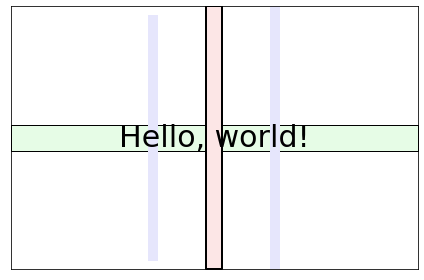

In [73]:
fig, ax = plt.figure(), plt.axes()
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_xticks([])
ax.set_yticks([])

# make colors
green = (.9, .99, .9)
blue = (.9, .9, .99)
red = (.99, .9, .9)

# Text with default zorder of 3
text = ax.text(0.5, 0.5, "Hello, world!",
               size = 30,
               ha = 'center',
               va = 'center')

# Lines with default zorder of 2
line1 = ax.axvline(0.65,
                   linewidth = 10,
                   color = blue)
line2 = ax.plot([0.35, 0.35], [.05, .95],
                linewidth = 10, 
                color = blue)

# Patches with default zorder of 1
patch1 = ax.fill_between([0,1], 0.45, .55,
                         facecolor = green,
                         edgecolor = 'black')
patch2 = ax.fill_between([.48,.52], 0, 1,
                         facecolor = red, 
                         edgecolor = 'black',
                         linewidth = 2)

# Check zorders
print(text.get_zorder())
print(line1.get_zorder())
print(line2[0].get_zorder())
print(patch1.get_zorder())
print(patch2.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("default-z.pdf")
plt.show()

In [74]:
savepy('default-z')

0
0
1
0.75
0.5
0.25


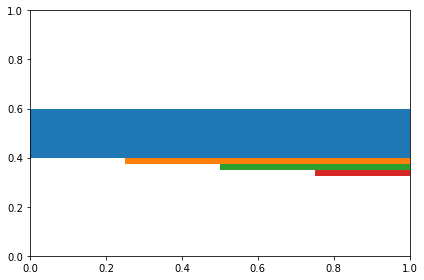

In [75]:
fig, ax = plt.figure(), plt.axes()

print(fig.get_zorder())
print(ax.get_zorder())

for i in [0, 0.25, .5, .75]:
    
    t = ax.fill_between([i, 1], 0.4 - i/10, .6 - i/20,
                        zorder = 1 - i)
    print(t.get_zorder())

ax.set_xlim(0,1)
ax.set_ylim(0,1)
#truncate
plt.tight_layout()
plt.savefig("reverse-z.pdf")
plt.show()

In [76]:
savepy('reverse-z')

0


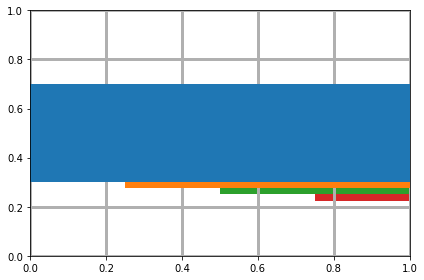

In [77]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
print(ax.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("default-axes.pdf")
plt.show()

In [78]:
savepy('default-axes')

0


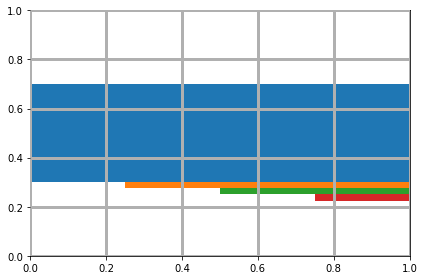

In [79]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_axisbelow(False)
print(ax.get_zorder())
#truncate
plt.tight_layout()
plt.savefig("front-axes.pdf")
plt.show()

In [80]:
savepy('front-axes')

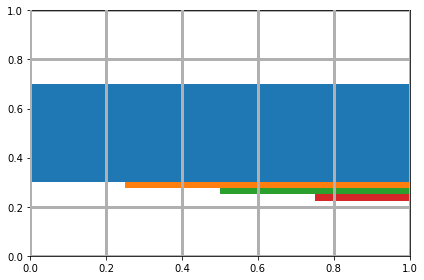

In [81]:
fig, ax = plt.figure(), plt.axes()
for i in [0, 0.25, .5, .75]:
    ax.fill_between([i,1], 0.3 - i/10, .7 - i/20,
                    zorder = 2-i)
ax.grid(True, linewidth = 3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.xaxis.set_zorder(3)
#truncate
plt.tight_layout()
plt.savefig("front-xaxis.pdf")
plt.show()

In [82]:
savepy("front-xaxis")


In [83]:
## coordinate systems

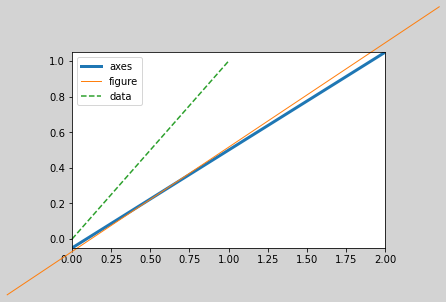

In [84]:
fig, ax = plt.figure(facecolor = 'lightgray'), plt.axes()

ax.plot([0, 1], [0, 1],
        linewidth = 3,
        transform = ax.transAxes,
        label = 'axes')

ax.plot([0, 1], [0, 1],
        color = 'C1',
        linewidth = 1,
        transform = fig.transFigure,
        clip_on = False,
        label = 'figure')

ax.plot([0, 1], [0, 1],
        color = 'C2',
        linestyle = 'dashed',
        clip_on = False,
        label = 'data')

ax.set_xlim(0,2)
ax.legend()
#truncate
plt.tight_layout()
plt.savefig('coords.pdf', facecolor = 'lightgray')
plt.show()

In [85]:
savepy('coords')

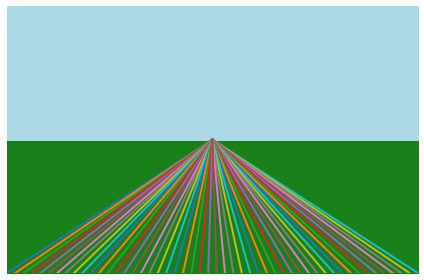

In [86]:
fig, ax = plt.figure(), plt.axes()
ax.axis('off')
# lines to horizon
for i in np.linspace(0,1,50):
    ax.plot([i,.5], [0.00, .5], 
            transform = ax.transAxes,
            linewidth = 2,
            zorder = 10-(i-0.5)**2)

# fill bottom half
green = (.1, .5, .1)
ax.fill_between(x = (0,1),
                y1 = 0,
                y2 = 0.5,
                transform = ax.transAxes,
                color = green)

# fill top half
ax.fill_between(x = (0,1),
                y1 = 0.5,
                y2 = 1,
                transform = ax.transAxes,
                color = 'lightblue')
#truncate
plt.tight_layout()
plt.savefig("coord-horizon.pdf")
plt.show()

In [87]:
savepy('coord-horizon')

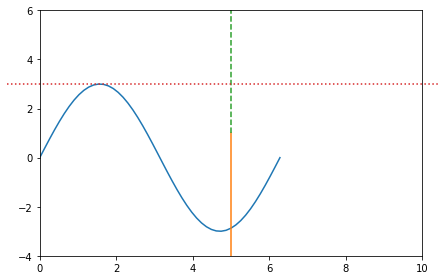

In [88]:
# Plot setup 
fig, ax = plt.figure(), plt.axes()
x = np.linspace(0, 2*np.pi)
sin, = ax.plot(x, 3*np.sin(x))
ax.set_xlim(0, 10)
ax.set_ylim(-4, 6)
fig.tight_layout()

# Vertical line with axes coordinates
middle = [0.5, 0.5]
bottom_half = [0, 0.5]
ax.plot(middle, bottom_half,
        transform = ax.transAxes)

# Continue vertical line with data coordinates
mid_in_display = ax.transAxes.transform([0.5, 0.5])
mid_in_data = ax.transData.inverted().transform(mid_in_display)
top_mid_in_display = ax.transAxes.transform([0.5, 1])
top_mid_in_data = ax.transData.inverted()\
                        .transform(top_mid_in_display)
x = mid_in_data[0], top_mid_in_data[0]
y = mid_in_data[1], top_mid_in_data[1]
ax.plot(x, y, linestyle = 'dashed')

# Horizontal lines in figure coordinates
top_wave_display = ax.transData.transform([np.pi/2, 3])
top_wave_figure = fig.transFigure.inverted()\
                         .transform(top_wave_display)

y = top_wave_figure[1],  top_wave_figure[1]
ax.plot([0,1], y,
        transform = fig.transFigure,
        linestyle = 'dotted',
        clip_on = False)
#truncate
plt.savefig("coord-trans.pdf")
plt.show()

In [89]:
savepy('coord-trans')

In [90]:
## window extents

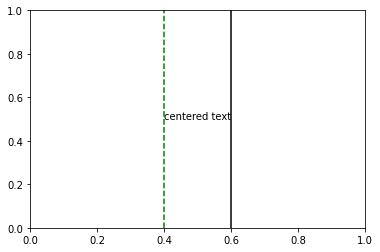

In [91]:
fig, ax = plt.figure(), plt.axes()

center_text = ax.text(0.5, 0.5,
                      'centered text',
                      ha = 'center')

fig.canvas.draw()
box = center_text.get_window_extent()
data_box = ax.transData.inverted().transform(box)

# left limit
ax.axvline(data_box[0][0],
           color = 'green',
           linestyle = 'dashed')

# right limit
ax.axvline(data_box[1][0],
           color = 'black')
#truncate
plt.savefig("window-extent.pdf")

In [92]:
savepy('window-extent')

0.099814 0.09981477624167912


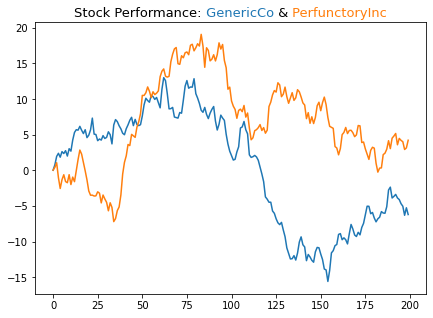

In [93]:
x_len = 200
x = range(0, x_len)

# Create a Gaussian random walk starting at 0
start = np.zeros(1)
y1 = np.concatenate([start,np.random.normal(0, 1, x_len-1)]).cumsum()
y2 = np.concatenate([start,np.random.normal(0, 1, x_len-1)]).cumsum()

# Start plot
fig, ax = plt.figure(figsize = (7,5)), plt.axes()
fig.canvas.draw()

# Color arguments added to make defaults explicit
ax.plot(x, y1, color = 'C0')
ax.plot(x, y2, color = 'C1')

# Tuned by hand
shift = .099814 # Where titling starts on x-axis
y_level = 1.02
transform = ax.transAxes # use axes coords

t1 = ax.text(shift, y_level, 'Stock Performance:', 
        transform = transform, 
        ha = 'left',
        fontsize = 13,
        color = 'black')

# Get where text ended
x_pos = t1.get_window_extent()\
       .transformed(transform.inverted()).x1

t2 = ax.text(x_pos, y_level, ' GenericCo', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'C0')

x_pos = t2.get_window_extent()\
       .transformed(transform.inverted()).x1

t3 = ax.text(x_pos, y_level, ' &', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'black')

x_pos = t3.get_window_extent()\
       .transformed(transform.inverted()).x1

t4 = ax.text(x_pos, y_level, ' PerfunctoryInc', 
        transform = transform, 
        ha = 'left', 
        fontsize = 13,
        color = 'C1')

x_pos = t4.get_window_extent()\
       .transformed(transform.inverted()).x1

# compare distances to the edge
# equal means perfect centering
print(shift, 1-x_pos) 
#truncate
plt.savefig("multicolor-title.pdf")

In [94]:
savepy("multicolor-title")

5.933355734767025 6.066644265232975


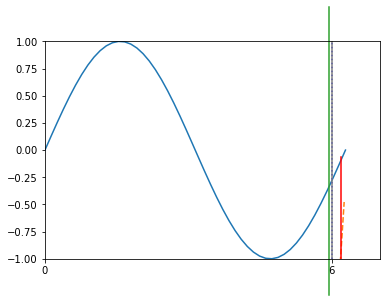

In [95]:
fig, ax = plt.figure(), plt.axes()


x = np.linspace(0, 2*np.pi)
sin, = ax.plot(x, np.sin(x))

ax.set_xticks([0,6])
ax.set_xlim(0,7)
ax.set_ylim(-1,1)
#ax.get_xticklabels()[0].get_window_extent().transformed(ax.transData.inverted())#.y1
#sin.get_window_extent()
fig.canvas.draw()



j = 1
x0 = ax.get_xticklabels()[j].get_window_extent().transformed(ax.transData.inverted()).x0
x1 = ax.get_xticklabels()[j].get_window_extent().transformed(ax.transData.inverted()).x1

print(x0,x1)
#ax.axvline(x0, -0.2, 1.2, clip_on = False) #, transform = ax.transAxes)
#ax.axvline(x1, -0.2, 1.2, clip_on = False) #, transform = ax.transAxes)

j = 1
base = ax.get_xticklabels()[j].get_window_extent()
x0 = base.transformed(ax.transData.inverted()).x0
x1 = base.transformed(ax.transData.inverted()).x1


ax.transData.inverted().transform(base)

displayx = base.x0, base.x1

#fig.canvas.draw()
#ax.plot((x0, x1), (-1,1)) #, transform = None )

ax.plot((displayx[0],displayx[1]), (0,100), transform = None, linestyle ='dashed' )


x0d = ax.transData.transform((6,0))[0]
ax.plot( [x0d]*2, [0,144.72] , transform = None, color = 'red')

x0a = ax.transLimits.transform((6,0))[0]
ax.plot([x0a]*2, [0,1] , transform = ax.transAxes, color = 'blue', linestyle = 'dotted')

ax.axvline(6, color = 'gray')

ax.plot([0.78190724]*2, [0,1], transform = fig.transFigure, clip_on = False)
#plt.tight_layout()

In [96]:
ax.transLimits.transform((6,0))

array([0.85714286, 0.5       ])

In [97]:
ax.transData.transform((6,0))[0]

340.9714285714286

In [98]:
fig.transFigure.inverted().transform([6,0])

array([0.01388889, 0.        ])

In [99]:
ax.transData.inverted().transform(base)

array([[ 5.93335573, -1.15636497],
       [ 6.06664427, -1.06438558]])

In [100]:
fig.transFigure.inverted().transform(base)

array([[0.78190724, 0.06597222],
       [0.79666419, 0.10069444]])

In [101]:

ax.get_xticklabels()[0].get_window_extent().transformed(ax.transAxes.inverted()).x0


-0.009520609318996426

In [102]:
## ELEMENTS window extents